<a href="https://colab.research.google.com/github/HuynhVietDung/skin_cancer_classification/blob/main/Skin_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skin Cancer Classification Report

## Part 1: Data Preparation

### Download Data and Setting the Seed for Reproducibility
- Download Dataset at https://www.dropbox.com/scl/fi/aco2jcp6kkzij0v9f61dc/data.zip?rlkey=iak9wd4t96t3opo85lqeq7bfz&dl=0.
- Defined and invoked set_seed function to ensure consistency across runs.
- Configured random seeds for numpy, random, and torch.

### Data Directory Preparation
- Created a validation directory at /content/melanoma_cancer_dataset/validation/.
- Utilized an existing training directory at /content/melanoma_cancer_dataset/train/.
- Formed separate sub-directories for each label in the validation set.

### Data Splitting (Train-Validation)
- Split the dataset with an 8:2 ratio between training and validation. Moveing 20% of images from each label in the training set to the validation set.
- Employed train_test_split for a randomized and representative split.

### DataModule Class Implementation
- Developed DataModule class, a subclass of LightningDataModule.
- Constructor accepts batch size, number of workers, file paths, and optional transformations.

### Data Transformations
- Defined transformations for resizing, normalizing, and tensor conversion.
- Additional training data augmentations include random rotation, flips, and color jitter.

### Data Loader Configuration
- setup method in DataModule prepares datasets with respective transformations.
- Data loaders for training, validation, and testing datasets are instantiated.
- Instantiated training and validation data loaders for efficient data handling.


## Part 2: CNN Architectures

We built 3 models( AlexNet, VGG16 and ResNet50 ) and applied Data Augmentation to find the best model. We used Accuracy as the key metric to evaluate these models. The results are summarized in Part 3.

![Method](https://github.com/HuynhVietDung/skin_cancer_classification/blob/main/Method.png?raw=True)

### AlexNet Architecture
- *Layer Configurations:*
  - First Layer: Input 3, Output 96, Kernel 11x11, Stride 4, Padding 2, ReLU Activation, MaxPooling.
  - Second Layer: Input 96, Output 256, Kernel 5x5, Padding 2, ReLU Activation, MaxPooling.
  - Third to Fifth Layers: Varying channels (256 to 384), Kernel 3x3, Padding 1, ReLU Activation, MaxPooling on Fifth Layer.
- *Common Components:*
  - Optimizer: Adam (Learning Rate: 1e-3).
  - Loss Function: Cross-entropy.

### VGG16 Architecture
- *Layer Details:*
  - Convolutional Layers: Based on VGG16 configuration.
  - Adaptive Average Pooling: Output size 7x7.
  - Fully Connected Layers: First Layer 512x7x7, Second Layer 4096, Third Layer matches number of classes.
- *Common Components:*
  - Optimizer: Adam (Learning Rate: 1e-3).
  - Loss Function: Cross-entropy.

### ResNet Architecture
- *Configuration:*
  - Backbone Network: Pre-trained torchvision.models.resnet50.
  - Feature Extractor: Sequential layers from ResNet-50, excluding the final fully connected layer.
  - Classifier: Linear layer for two-class output.
- *Common Components:*
  - Optimizer: Adam (Learning Rate: 1e-3).
  - Loss Function: Cross-entropy.



## Part 3: Model Results

Number of batch size: 32
Number of epoch: 10

### Without Data Augmentation

| Model   | AlexNet | VGG16 | ResNet |
|---------|--------|--------|--------|
| Val Acc | 91.09 | 90.43 | 91.7 |
| Test Acc| 90.8  | 90.57 | 92.28 |

### With Data Augmentation

| Model   | AlexNet | VGG16 | ResNet |
|---------|--------|--------|--------|
| Val Acc | 86.75 | 87.18 | 91.04 |
| Test Acc| 87.91 | 85.03 | 91.27 |


## Part 4: Conclusion

There is no big difference between the results of the models. Applying data augmentation methods also does not help increase the accuracy of the models. The highest result is ResNet50 without Data Augmentation get highest Accuracy 91.7% on Trainset and 92.28% Accuracy, 95.87% Recall, 89.89% Precision and 92.61% F1Score on Testset . This is also the main model that we want to propose for this problem of Melanoma Classification.

### Our code's showed below.



## Download Dataset and Module

In [ ]:
!wget -O data.zip https://www.dropbox.com/scl/fi/aco2jcp6kkzij0v9f61dc/data.zip?rlkey=iak9wd4t96t3opo85lqeq7bfz&dl=0

--2024-01-10 06:31:42--  https://www.dropbox.com/scl/fi/aco2jcp6kkzij0v9f61dc/data.zip?rlkey=iak9wd4t96t3opo85lqeq7bfz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6833a93e8b17d5a0b92b25c64f.dl.dropboxusercontent.com/cd/0/inline/CLCjjrd59Ajhy9Sg7c1C3XT79iQiIspAhMMxzhpyZrv8Pf92DHdQZm6PQTl1L7JjA2ubLnpAu4bHuTPohwl9H3_S0qfmz5PP1rH1tex_HdT4wmtsONsMpUT-ZIReQE52cgkpUigBoFM8cCmiL4p2UQvL/file# [following]
--2024-01-10 06:31:44--  https://uc6833a93e8b17d5a0b92b25c64f.dl.dropboxusercontent.com/cd/0/inline/CLCjjrd59Ajhy9Sg7c1C3XT79iQiIspAhMMxzhpyZrv8Pf92DHdQZm6PQTl1L7JjA2ubLnpAu4bHuTPohwl9H3_S0qfmz5PP1rH1tex_HdT4wmtsONsMpUT-ZIReQE52cgkpUigBoFM8cCmiL4p2UQvL/file
Resolving uc6833a93e8b17d5a0b92b25c64f.dl.dropboxusercontent.com (uc6833a93e8b17d5a0b92b25c64f.dl.dropboxusercontent.com)... 162.125.2.15, 2620:100

In [ ]:
!pip install lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.7/777.7 kB 25.4 MB/s eta 0:00:00


In [ ]:
!unzip 'data.zip'

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: melanoma_cancer_dataset/train/benign/melanoma_1348.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_250.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_2562.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_9789.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_4086.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_3030.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_4665.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_1161.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_3931.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_804.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_204.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_1533.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_1695.jpg  
  inflating: melanoma_cancer_dataset

## Import Libraries and Set Seed values

In [ ]:
from glob import glob
import pandas as pd
import numpy as np
import os
import lightning as L
from lightning.pytorch.callbacks import ModelCheckpoint, EarlyStopping
import torchmetrics
import torch
from torch import nn
import torchvision
from torchvision import transforms
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import random
from lightning.pytorch.callbacks import ModelSummary
import random
import shutil

def set_seed(seed: int = 0) -> None:
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    # Set a fixed value for the hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)
    print(f"Random seed set as {seed}")
set_seed()

Random seed set as 0


## Spit Dataset

In [ ]:
# Create the validation folder
val_path = '/content/melanoma_cancer_dataset/validation/'
train_path = '/content/melanoma_cancer_dataset/train/'
list_ = [name for name in os.listdir(train_path)]

os.makedirs(val_path, exist_ok = True)
# Create label folders
for name in list_:
  label_folder = os.path.join(val_path, name)
  os.makedirs(label_folder, exist_ok = True)

In [ ]:
# we will split with the ratio 8 : 2
# Move 20% images from train folder to validation folder
nums_train = {}

for name in list_:
  label_folder = os.path.join(train_path, name)
  file_names = [name for name in os.listdir(label_folder)]
  nums_train[name] = len(file_names)
  # Split with train test split
  train, val = train_test_split(file_names, test_size=0.2, random_state=0)
  # Move from source folder to destination folder
  for image in val:
    src_path = os.path.join(label_folder, image)
    des_path = os.path.join(val_path, name)
    shutil.move(src_path, des_path)
  #print(f'Number of samples of {name} images in validation folder: {len(val)}')
  #print(len([name for name in os.listdir(os.path.join(val_path, name))]))

<Axes: title={'center': 'Class Distribution '}, xlabel='Type', ylabel='Number of image'>

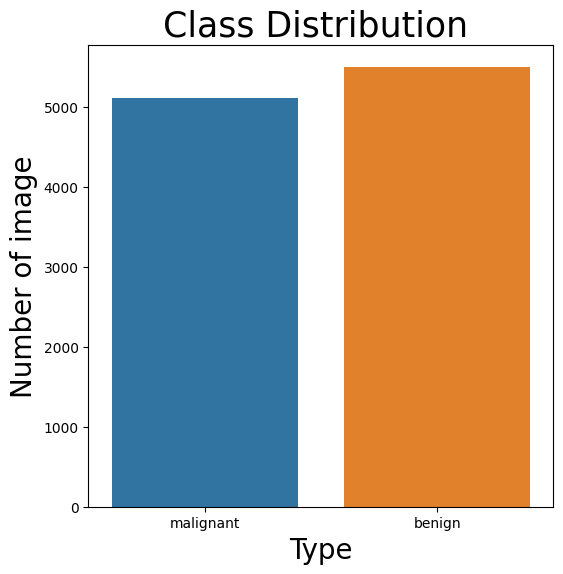

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Class Distribution ',fontsize=25)
plt.ylabel('Number of image',fontsize=20)
plt.xlabel('Type',fontsize=20)

keys = list(nums_train.keys())
vals = list(nums_train.values())
sns.barplot(x=keys, y=vals)

In [ ]:
NAME2NUMBER = {}
for index, label in enumerate(list_):
  NAME2NUMBER[label] = index

def get_path(path):
  paths = []
  for name in list_:
    l = glob(f"{path}{name}/*.jpg")
    for i in l:
      paths.append({"name": name,
                    "path": i,
                    "label": NAME2NUMBER[name]})
  return paths

train_paths = get_path(train_path)
val_paths = get_path(val_path)

## Define Class DataSet and Class DataModule


In [ ]:
class DataSet(torch.utils.data.Dataset):

  def __init__(self, features, transform=None):
    super(DataSet, self).__init__()
    self.features = features
    self.transform = transform

  def __len__(self):
    return len(self.features)

  def __getitem__(self, idx):
    paths = self.features[idx]["path"]
    images = torchvision.io.read_image(paths)
    #images = torch.stack([images[0], images[0], images[0]], 0)

    if self.transform is not None:
        images = self.transform(images)

    label = torch.tensor(self.features[idx]["label"])
    return {"images": images, "labels": label}


Data = DataSet(train_paths)

In [ ]:
next(iter(Data))["images"].shape

torch.Size([3, 300, 300])

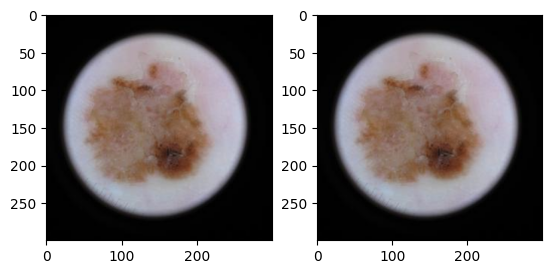

In [ ]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))

show([next(iter(Data))["images"], next(iter(Data))["images"]])

In [ ]:
class DataModule(L.LightningDataModule):
    def __init__(self, batch_size, num_workers, train_path, val_path, transform=None):
        super(DataModule, self).__init__()
        self.train_path = train_path
        self.val_path = val_path
        self.batch_size = batch_size
        self.num_workers = num_workers
        # Tạo một danh sách các phép biến đổi bạn muốn áp dụng trong compose


# Tạo compose từ danh sách phép biến đổi
        self.train_transforms = [
                  transforms.ToPILImage(),
                  transforms.Resize((224, 224)),
                  transforms.ToTensor(),
                  transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))

        ]
        if transform != None:
          for i in transform[::-1]:
            self.train_transforms.insert(2, i)

        self.train_transforms = transforms.Compose(self.train_transforms)

        self.test_transforms = transforms.Compose(
            [
                transforms.ToPILImage(),
                transforms.Resize((224, 224)),
                transforms.ToTensor(),
                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
            ]
        )
    def setup(self, stage=None):
        train_paths = get_path(self.train_path)
        val_paths = get_path(self.val_path)
        train_paths, test_paths = train_test_split(train_paths, test_size=0.2, random_state=0)

        self.train_dataset = DataSet(train_paths, transform=self.train_transforms)  # Áp dụng data_transforms trong DataSet
        self.val_dataset = DataSet(val_paths, transform=self.test_transforms)
        self.test_dataset = DataSet(test_paths, transform=self.test_transforms)


    def train_dataloader(self):
        return torch.utils.data.DataLoader(self.train_dataset, shuffle=True,
                                           batch_size=self.batch_size, num_workers=self.num_workers)

    def val_dataloader(self):
        return torch.utils.data.DataLoader(self.val_dataset, shuffle=False,
                                           batch_size=self.batch_size, num_workers=self.num_workers)

    def test_dataloader(self):
        return torch.utils.data.DataLoader(self.test_dataset, shuffle=False,
                                           batch_size=self.batch_size, num_workers=self.num_workers)


transform = [transforms.RandomRotation(degrees=45),
              transforms.RandomHorizontalFlip(),
              transforms.RandomVerticalFlip(),
              transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.1)]

data_module = DataModule(8, 2, train_path, val_path, transform= transform)
data_module.setup()
train_loader = data_module.train_dataloader()
val_loader = data_module.val_dataloader()

In [ ]:
num_train_images = len(train_loader.dataset)
print("Number of trainset Images:", num_train_images)

num_val_images = len(val_loader.dataset)
print("Number of validatation set Imgae", num_val_images)

Number of trainset Images: 6787
Number of validatation set Imgae 2121


In [ ]:
next(iter(train_loader))["images"].shape

torch.Size([8, 3, 224, 224])

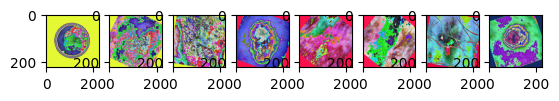

In [ ]:
images = [image for image in next(iter(train_loader))["images"]]
show(images)

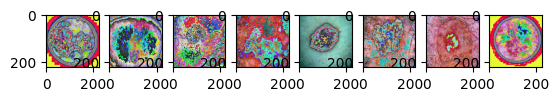

In [ ]:
images = [image for image in next(iter(val_loader))["images"]]
show(images)

## Modeling

### Data Augmentation

In [ ]:
# Methods using in this scope
transform = [transforms.RandomRotation(degrees=15),
              transforms.RandomHorizontalFlip(),
              transforms.RandomVerticalFlip(),
              transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.1)]

BATCH_SIZE = 32

# Create DataModules
aug_data_module = DataModule(BATCH_SIZE, 1, train_path, val_path, transform= transform) # with augmentation

nonaug_data_module = DataModule(BATCH_SIZE, 1, train_path, val_path, transform= None) # without augmentation

### AlexNet

In [ ]:
class AlexNet(L.LightningModule):
    def __init__(self, lr=1e-4, num_classes=2):
        super(AlexNet, self).__init__()
        self.lr = lr
        self.loss = torch.nn.CrossEntropyLoss()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.AdaptiveAvgPool2d((6, 6))
        )

        self.classifier = nn.Sequential(
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch['images'], batch['labels']
        y_hat = self(x)
        loss = self.loss(y_hat, y)
        accuracy = (y_hat.argmax(dim=1) == y).float().mean()
        self.log_dict({'loss': loss, 'acc': accuracy}, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch['images'], batch['labels']
        y_hat = self(x)
        val_loss = self.loss(y_hat, y)
        val_accuracy = (y_hat.argmax(dim=1) == y).float().mean()
        self.log_dict({'val_loss': val_loss, 'val_acc': val_accuracy}, prog_bar=True)
        return val_loss

    def test_step(self, batch, batch_idx):
        x, y = batch['images'], batch['labels']
        y_hat = self(x)
        test_loss = self.loss(y_hat, y)
        #test_accuracy = (y_hat.argmax(dim=1) == y).float().mean()

        y_pred = y_hat.argmax(dim=1).cpu().numpy()
        y_true = y.cpu().numpy()
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        self.log_dict({'test_loss': test_loss, 'test_acc': accuracy,
                       'test_recall': recall, 'test_precision': precision,
                       'test_F1_score': f1}, prog_bar=True)
        return test_loss

    def predict_step(self, batch, batch_idx, dataloader_idx=None):
        x, _ = batch['images'], batch['labels']
        y_hat = self(x)
        probabilities = torch.sigmoid(y_hat)
        predicted_labels = torch.argmax(probabilities, dim=1)
        return {"y_pred": predicted_labels}

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        return optimizer

In [ ]:
### Without Data Augmentation
model_checkpoint = ModelCheckpoint(dirpath='checkpoint/AlexNet',
                                   monitor="val_acc",
                                   verbose=True,
                                   mode="max",
                                   save_top_k=1
                                   )
early_stopping = EarlyStopping(monitor="val_acc", mode="max", min_delta=1e-4, patience=5)
callbacks = [model_checkpoint, early_stopping]

model = AlexNet(num_classes = 2)
trainer = L.Trainer(max_epochs=10, detect_anomaly=True, callbacks=callbacks)
trainer.fit(model, nonaug_data_module)

INFO: You have turned on `Trainer(detect_anomaly=True)`. This will significantly slow down compute speed and is recommended only for model debugging.
INFO:lightning.pytorch.utilities.rank_zero:You have turned on `Trainer(detect_anomaly=True)`. This will significantly slow down compute speed and is recommended only for model debugging.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name       | Type    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 213: 'val_acc' reached 0.80481 (best 0.80481), saving model to '/content/checkpoint/AlexNet/epoch=0-step=213.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 213: 'val_acc' reached 0.80481 (best 0.80481), saving model to '/content/checkpoint/AlexNet/epoch=0-step=213.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 1, global step 426: 'val_acc' reached 0.86091 (best 0.86091), saving model to '/content/checkpoint/AlexNet/epoch=1-step=426.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 1, global step 426: 'val_acc' reached 0.86091 (best 0.86091), saving model to '/content/checkpoint/AlexNet/epoch=1-step=426.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 2, global step 639: 'val_acc' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 2, global step 639: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 3, global step 852: 'val_acc' reached 0.88213 (best 0.88213), saving model to '/content/checkpoint/AlexNet/epoch=3-step=852.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 3, global step 852: 'val_acc' reached 0.88213 (best 0.88213), saving model to '/content/checkpoint/AlexNet/epoch=3-step=852.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 4, global step 1065: 'val_acc' reached 0.89486 (best 0.89486), saving model to '/content/checkpoint/AlexNet/epoch=4-step=1065.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 4, global step 1065: 'val_acc' reached 0.89486 (best 0.89486), saving model to '/content/checkpoint/AlexNet/epoch=4-step=1065.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 5, global step 1278: 'val_acc' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 5, global step 1278: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 6, global step 1491: 'val_acc' reached 0.90570 (best 0.90570), saving model to '/content/checkpoint/AlexNet/epoch=6-step=1491.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 6, global step 1491: 'val_acc' reached 0.90570 (best 0.90570), saving model to '/content/checkpoint/AlexNet/epoch=6-step=1491.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 7, global step 1704: 'val_acc' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 7, global step 1704: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 8, global step 1917: 'val_acc' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 8, global step 1917: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 9, global step 2130: 'val_acc' reached 0.91089 (best 0.91089), saving model to '/content/checkpoint/AlexNet/epoch=9-step=2130.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 9, global step 2130: 'val_acc' reached 0.91089 (best 0.91089), saving model to '/content/checkpoint/AlexNet/epoch=9-step=2130.ckpt' as top 1
INFO: `Trainer.fit` stopped: `max_epochs=10` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


In [ ]:
trainer.test(model, nonaug_data_module)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_F1_score       │    0.9112702012062073     │
│         test_acc          │    0.9080730676651001     │
│         test_loss         │    0.22008700668811798    │
│      test_precision       │    0.8932141065597534     │
│        test_recall        │    0.9339918494224548     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.22008700668811798,
  'test_acc': 0.9080730676651001,
  'test_recall': 0.9339918494224548,
  'test_precision': 0.8932141065597534,
  'test_F1_score': 0.9112702012062073}]

In [ ]:
### With Data Augmentation
model_checkpoint = ModelCheckpoint(dirpath='checkpoint/AlexNet',
                                   monitor="val_acc",
                                   verbose=True,
                                   mode="max",
                                   save_top_k=1
                                   )
early_stopping = EarlyStopping(monitor="val_acc", mode="max", min_delta=1e-4, patience=5)
callbacks = [model_checkpoint, early_stopping]

model = AlexNet(num_classes = 2)
trainer = L.Trainer(max_epochs=10, detect_anomaly=True, callbacks=callbacks)
trainer.fit(model, aug_data_module)

INFO: You have turned on `Trainer(detect_anomaly=True)`. This will significantly slow down compute speed and is recommended only for model debugging.
INFO:lightning.pytorch.utilities.rank_zero:You have turned on `Trainer(detect_anomaly=True)`. This will significantly slow down compute speed and is recommended only for model debugging.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/callbacks/model_checkpoint.py:639: Checkpoint directory /content/checkpoint/AlexNet exists and is not emp

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 213: 'val_acc' reached 0.82178 (best 0.82178), saving model to '/content/checkpoint/AlexNet/epoch=0-step=213.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 213: 'val_acc' reached 0.82178 (best 0.82178), saving model to '/content/checkpoint/AlexNet/epoch=0-step=213.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 1, global step 426: 'val_acc' reached 0.83640 (best 0.83640), saving model to '/content/checkpoint/AlexNet/epoch=1-step=426.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 1, global step 426: 'val_acc' reached 0.83640 (best 0.83640), saving model to '/content/checkpoint/AlexNet/epoch=1-step=426.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 2, global step 639: 'val_acc' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 2, global step 639: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 3, global step 852: 'val_acc' reached 0.85809 (best 0.85809), saving model to '/content/checkpoint/AlexNet/epoch=3-step=852.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 3, global step 852: 'val_acc' reached 0.85809 (best 0.85809), saving model to '/content/checkpoint/AlexNet/epoch=3-step=852.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 4, global step 1065: 'val_acc' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 4, global step 1065: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 5, global step 1278: 'val_acc' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 5, global step 1278: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 6, global step 1491: 'val_acc' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 6, global step 1491: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 7, global step 1704: 'val_acc' reached 0.86657 (best 0.86657), saving model to '/content/checkpoint/AlexNet/epoch=7-step=1704.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 7, global step 1704: 'val_acc' reached 0.86657 (best 0.86657), saving model to '/content/checkpoint/AlexNet/epoch=7-step=1704.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 8, global step 1917: 'val_acc' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 8, global step 1917: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 9, global step 2130: 'val_acc' reached 0.86752 (best 0.86752), saving model to '/content/checkpoint/AlexNet/epoch=9-step=2130-v1.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 9, global step 2130: 'val_acc' reached 0.86752 (best 0.86752), saving model to '/content/checkpoint/AlexNet/epoch=9-step=2130-v1.ckpt' as top 1
INFO: `Trainer.fit` stopped: `max_epochs=10` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


In [ ]:
trainer.test(model, aug_data_module)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_F1_score       │    0.8891600966453552     │
│         test_acc          │    0.8791986107826233     │
│         test_loss         │    0.26290586590766907    │
│      test_precision       │    0.8429716229438782     │
│        test_recall        │    0.9450973272323608     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.26290586590766907,
  'test_acc': 0.8791986107826233,
  'test_recall': 0.9450973272323608,
  'test_precision': 0.8429716229438782,
  'test_F1_score': 0.8891600966453552}]

### VGG

In [ ]:
class VGG(nn.Module):
    def __init__(self, cfg, num_classes=2, batch_norm=False):
        super(VGG, self).__init__()
        self.features = self._make_layers(cfg, batch_norm)
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

    def _make_layers(self, cfg, batch_norm):
        layers = []
        in_channels = 3
        vgg_config = {
            'C': [64, 64, 'M', 128, 128, 'M', 256, 256, 'C1_256', 'M', 512, 512, 'C1_512', 'M', 512, 512, 'C1_512', 'M'],
            'D': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
            'E': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M']
        }

        for v in vgg_config[cfg]:
            if v == 'M':
                layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
            elif 'C1_' in str(v):
                conv1_channels = int(v.split('_')[1])
                conv1d = nn.Conv2d(in_channels, conv1_channels, kernel_size=1)
                if batch_norm:
                    layers += [conv1d, nn.BatchNorm2d(conv1_channels), nn.ReLU(inplace=True)]
                else:
                    layers += [conv1d, nn.ReLU(inplace=True)]
                in_channels = conv1_channels
            else:
                conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=1)
                if batch_norm:
                    layers += [conv2d, nn.BatchNorm2d(v), nn.ReLU(inplace=True)]
                else:
                    layers += [conv2d, nn.ReLU(inplace=True)]
                in_channels = v

        return nn.Sequential(*layers)


# Define a LightningModule using the custom VGG
class CustomVGG(L.LightningModule):
    def __init__(self, cfg='D', num_classes=2, lr=1e-4, batch_norm=False):
        super(CustomVGG, self).__init__()
        self.model = VGG(cfg, num_classes, batch_norm)
        self.lr = lr
        self.loss = torch.nn.CrossEntropyLoss()

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        x, y = batch['images'], batch['labels']
        y_hat = self(x)
        loss = self.loss(y_hat, y)
        accuracy = (y_hat.argmax(dim=1) == y).float().mean()
        self.log_dict({'loss': loss, 'acc': accuracy}, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch['images'], batch['labels']
        y_hat = self(x)
        val_loss = self.loss(y_hat, y)
        val_accuracy = (y_hat.argmax(dim=1) == y).float().mean()
        self.log_dict({'val_loss': val_loss, 'val_acc': val_accuracy}, prog_bar=True)
        return val_loss

    def test_step(self, batch, batch_idx):
        x, y = batch['images'], batch['labels']
        y_hat = self(x)
        test_loss = self.loss(y_hat, y)
        #test_accuracy = (y_hat.argmax(dim=1) == y).float().mean()
        y_pred = y_hat.argmax(dim=1).cpu().numpy()
        y_true = y.cpu().numpy()

        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        self.log_dict({'test_loss': test_loss, 'test_acc': accuracy,
                       'test_recall': recall, 'test_precision': precision,
                       'test_F1_score': f1}, prog_bar=True)
        return test_loss

    def predict_step(self, batch, batch_idx, dataloader_idx=None):
        x, _ = batch['images'], batch['labels']
        y_hat = self(x)
        probabilities = torch.sigmoid(y_hat)
        predicted_labels = torch.argmax(probabilities, dim=1)
        return {"y_pred": predicted_labels}

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        return optimizer

 VGG 16  


In [ ]:
### Without Data Augmentation
model_checkpoint = ModelCheckpoint(dirpath='checkpoint/VGG',
                                   monitor="val_acc",
                                   verbose=True,
                                   mode="max",
                                   save_top_k=1
                                   )
early_stopping = EarlyStopping(monitor="val_acc", mode="max", min_delta=1e-4, patience=5)
callbacks = [model_checkpoint, early_stopping]

model = CustomVGG(num_classes= 2, batch_norm= False)
trainer = L.Trainer(max_epochs=10, detect_anomaly=True, callbacks=callbacks)
trainer.fit(model, nonaug_data_module)

INFO: You have turned on `Trainer(detect_anomaly=True)`. This will significantly slow down compute speed and is recommended only for model debugging.
INFO:lightning.pytorch.utilities.rank_zero:You have turned on `Trainer(detect_anomaly=True)`. This will significantly slow down compute speed and is recommended only for model debugging.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name  | Type         

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 213: 'val_acc' reached 0.82225 (best 0.82225), saving model to '/content/checkpoint/VGG/epoch=0-step=213.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 213: 'val_acc' reached 0.82225 (best 0.82225), saving model to '/content/checkpoint/VGG/epoch=0-step=213.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 1, global step 426: 'val_acc' reached 0.85573 (best 0.85573), saving model to '/content/checkpoint/VGG/epoch=1-step=426.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 1, global step 426: 'val_acc' reached 0.85573 (best 0.85573), saving model to '/content/checkpoint/VGG/epoch=1-step=426.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 2, global step 639: 'val_acc' reached 0.88260 (best 0.88260), saving model to '/content/checkpoint/VGG/epoch=2-step=639.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 2, global step 639: 'val_acc' reached 0.88260 (best 0.88260), saving model to '/content/checkpoint/VGG/epoch=2-step=639.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 3, global step 852: 'val_acc' reached 0.88826 (best 0.88826), saving model to '/content/checkpoint/VGG/epoch=3-step=852.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 3, global step 852: 'val_acc' reached 0.88826 (best 0.88826), saving model to '/content/checkpoint/VGG/epoch=3-step=852.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 4, global step 1065: 'val_acc' reached 0.90193 (best 0.90193), saving model to '/content/checkpoint/VGG/epoch=4-step=1065.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 4, global step 1065: 'val_acc' reached 0.90193 (best 0.90193), saving model to '/content/checkpoint/VGG/epoch=4-step=1065.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 5, global step 1278: 'val_acc' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 5, global step 1278: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 6, global step 1491: 'val_acc' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 6, global step 1491: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 7, global step 1704: 'val_acc' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 7, global step 1704: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 8, global step 1917: 'val_acc' reached 0.90429 (best 0.90429), saving model to '/content/checkpoint/VGG/epoch=8-step=1917.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 8, global step 1917: 'val_acc' reached 0.90429 (best 0.90429), saving model to '/content/checkpoint/VGG/epoch=8-step=1917.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 9, global step 2130: 'val_acc' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 9, global step 2130: 'val_acc' was not in top 1
INFO: `Trainer.fit` stopped: `max_epochs=10` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


In [ ]:
trainer.test(model, nonaug_data_module)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_F1_score       │    0.9037006497383118     │
│         test_acc          │    0.9057159423828125     │
│         test_loss         │     0.246837317943573     │
│      test_precision       │     0.938367486000061     │
│        test_recall        │    0.8768430948257446     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.246837317943573,
  'test_acc': 0.9057159423828125,
  'test_recall': 0.8768430948257446,
  'test_precision': 0.938367486000061,
  'test_F1_score': 0.9037006497383118}]

In [ ]:
### With Data Augmentation
model_checkpoint = ModelCheckpoint(dirpath='checkpoint/VGG',
                                   monitor="val_acc",
                                   verbose=True,
                                   mode="max",
                                   save_top_k=1
                                   )
early_stopping = EarlyStopping(monitor="val_acc", mode="max", min_delta=1e-4, patience=5)
callbacks = [model_checkpoint, early_stopping]

model = CustomVGG(num_classes= 2, batch_norm= False)

trainer = L.Trainer(max_epochs=10, detect_anomaly=True, callbacks=callbacks)
trainer.fit(model, aug_data_module)

INFO: You have turned on `Trainer(detect_anomaly=True)`. This will significantly slow down compute speed and is recommended only for model debugging.
INFO:lightning.pytorch.utilities.rank_zero:You have turned on `Trainer(detect_anomaly=True)`. This will significantly slow down compute speed and is recommended only for model debugging.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/callbacks/model_checkpoint.py:639: Checkpoint directory /content/checkpoint/VGG exists and is not empty.


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 213: 'val_acc' reached 0.68081 (best 0.68081), saving model to '/content/checkpoint/VGG/epoch=0-step=213.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 213: 'val_acc' reached 0.68081 (best 0.68081), saving model to '/content/checkpoint/VGG/epoch=0-step=213.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 1, global step 426: 'val_acc' reached 0.81094 (best 0.81094), saving model to '/content/checkpoint/VGG/epoch=1-step=426.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 1, global step 426: 'val_acc' reached 0.81094 (best 0.81094), saving model to '/content/checkpoint/VGG/epoch=1-step=426.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 2, global step 639: 'val_acc' reached 0.84960 (best 0.84960), saving model to '/content/checkpoint/VGG/epoch=2-step=639.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 2, global step 639: 'val_acc' reached 0.84960 (best 0.84960), saving model to '/content/checkpoint/VGG/epoch=2-step=639.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 3, global step 852: 'val_acc' reached 0.85714 (best 0.85714), saving model to '/content/checkpoint/VGG/epoch=3-step=852.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 3, global step 852: 'val_acc' reached 0.85714 (best 0.85714), saving model to '/content/checkpoint/VGG/epoch=3-step=852.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 4, global step 1065: 'val_acc' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 4, global step 1065: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 5, global step 1278: 'val_acc' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 5, global step 1278: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 6, global step 1491: 'val_acc' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 6, global step 1491: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 7, global step 1704: 'val_acc' reached 0.86374 (best 0.86374), saving model to '/content/checkpoint/VGG/epoch=7-step=1704.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 7, global step 1704: 'val_acc' reached 0.86374 (best 0.86374), saving model to '/content/checkpoint/VGG/epoch=7-step=1704.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 8, global step 1917: 'val_acc' reached 0.87176 (best 0.87176), saving model to '/content/checkpoint/VGG/epoch=8-step=1917-v1.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 8, global step 1917: 'val_acc' reached 0.87176 (best 0.87176), saving model to '/content/checkpoint/VGG/epoch=8-step=1917-v1.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 9, global step 2130: 'val_acc' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 9, global step 2130: 'val_acc' was not in top 1
INFO: `Trainer.fit` stopped: `max_epochs=10` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


In [ ]:
trainer.test(model, aug_data_module)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_F1_score       │    0.8681821823120117     │
│         test_acc          │    0.8503240942955017     │
│         test_loss         │     0.336561381816864     │
│      test_precision       │    0.7975687980651855     │
│        test_recall        │    0.9598377346992493     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.336561381816864,
  'test_acc': 0.8503240942955017,
  'test_recall': 0.9598377346992493,
  'test_precision': 0.7975687980651855,
  'test_F1_score': 0.8681821823120117}]

### ResNet

In [ ]:
class ResNet(L.LightningModule):
  def __init__(self, is_train=False, learning_rate=1e-3, num_classes=2):
    super(ResNet, self).__init__()
    backbone = torchvision.models.resnet50(weights="DEFAULT")
    num_filters = backbone.fc.in_features
    layers = list(backbone.children())[:-1]

    self.feature_extractor = torch.nn.Sequential(*layers)
    self.classifier = torch.nn.Linear(num_filters, num_classes)
    self.is_train = is_train
    self.learning_rate = learning_rate
    self.loss = torch.nn.CrossEntropyLoss()

  def forward(self, x):
    self.feature_extractor.eval()
    if self.is_train:
      representations = self.feature_extractor(x).flatten(1)
    else:
      with torch.no_grad():
        representations = self.feature_extractor(x).flatten(1)
    x = self.classifier(representations)
    return x

  def training_step(self, batch, batch_idx):
        x, y = batch['images'], batch['labels']
        y_hat = self(x)
        loss = self.loss(y_hat, y)
        accuracy = (y_hat.argmax(dim=1) == y).float().mean()
        self.log_dict({'loss': loss, 'acc': accuracy}, prog_bar=True)
        return loss

  def validation_step(self, batch, batch_idx):
        x, y = batch['images'], batch['labels']
        y_hat = self(x)
        val_loss = self.loss(y_hat, y)
        val_accuracy = (y_hat.argmax(dim=1) == y).float().mean()
        self.log_dict({'val_loss': val_loss, 'val_acc': val_accuracy}, prog_bar=True)
        return val_loss

  def test_step(self, batch, batch_idx):
        x, y = batch['images'], batch['labels']
        y_hat = self(x)
        test_loss = self.loss(y_hat, y)
        #test_accuracy = (y_hat.argmax(dim=1) == y).float().mean()
        y_pred = y_hat.argmax(dim=1).cpu().numpy()
        y_true = y.cpu().numpy()
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        self.log_dict({'test_loss': test_loss, 'test_acc': accuracy,
                       'test_recall': recall, 'test_precision': precision,
                       'test_F1_score': f1}, prog_bar=True)
        return test_loss

  def predict_step(self, batch, batch_idx, dataloader_idx=None):
        x, _ = batch['images'], batch['labels']
        y_hat = self(x)
        probabilities = torch.sigmoid(y_hat)
        predicted_labels = torch.argmax(probabilities, dim=1)
        return {"y_pred": predicted_labels}
  '''
  def predict_step(self, batch, batch_idx, dataloader_idx=None):
      x = batch["image"]
      y_pred = self(x)
      self.log_dict({"predict": y_pred}, prog_bar=True)
  '''
  def configure_optimizers(self):
    optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)  #
    return optimizer

In [ ]:
## Without Data Augmentation
model_checkpoint = ModelCheckpoint(dirpath='checkpoint/ResNet',
                                   monitor="val_acc",
                                   verbose=True,
                                   mode="max",
                                   save_top_k=1
                                   )
early_stopping = EarlyStopping(monitor="val_acc", mode="max", min_delta=1e-4, patience=5)
callbacks = [model_checkpoint, early_stopping]

model = ResNet(num_classes = 2)
trainer = L.Trainer(max_epochs=10, detect_anomaly=True, callbacks=callbacks)
trainer.fit(model, nonaug_data_module)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 99.9MB/s]
INFO: You have turned on `Trainer(detect_anomaly=True)`. This will significantly slow down compute speed and is recommended only for model debugging.
INFO:lightning.pytorch.utilities.rank_zero:You have turned on `Trainer(detect_anomaly=True)`. This will significantly slow down compute speed and is recommended only for model debugging.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 213: 'val_acc' reached 0.90382 (best 0.90382), saving model to '/content/checkpoint/ResNet/epoch=0-step=213.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 213: 'val_acc' reached 0.90382 (best 0.90382), saving model to '/content/checkpoint/ResNet/epoch=0-step=213.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 1, global step 426: 'val_acc' reached 0.90948 (best 0.90948), saving model to '/content/checkpoint/ResNet/epoch=1-step=426.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 1, global step 426: 'val_acc' reached 0.90948 (best 0.90948), saving model to '/content/checkpoint/ResNet/epoch=1-step=426.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 2, global step 639: 'val_acc' reached 0.91702 (best 0.91702), saving model to '/content/checkpoint/ResNet/epoch=2-step=639.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 2, global step 639: 'val_acc' reached 0.91702 (best 0.91702), saving model to '/content/checkpoint/ResNet/epoch=2-step=639.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 3, global step 852: 'val_acc' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 3, global step 852: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 4, global step 1065: 'val_acc' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 4, global step 1065: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 5, global step 1278: 'val_acc' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 5, global step 1278: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 6, global step 1491: 'val_acc' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 6, global step 1491: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 7, global step 1704: 'val_acc' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 7, global step 1704: 'val_acc' was not in top 1


In [ ]:
trainer.test(model, nonaug_data_module)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_F1_score       │    0.9261234998703003     │
│         test_acc          │    0.9228049516677856     │
│         test_loss         │    0.2141285091638565     │
│      test_precision       │    0.8989406824111938     │
│        test_recall        │    0.9587312340736389     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.2141285091638565,
  'test_acc': 0.9228049516677856,
  'test_recall': 0.9587312340736389,
  'test_precision': 0.8989406824111938,
  'test_F1_score': 0.9261234998703003}]

In [ ]:
## With Data Augmentation
model_checkpoint = ModelCheckpoint(dirpath='checkpoint/ResNet',
                                   monitor="val_acc",
                                   verbose=True,
                                   mode="max",
                                   save_top_k=1
                                   )
early_stopping = EarlyStopping(monitor="val_acc", mode="max", min_delta=1e-4, patience=5)
callbacks = [model_checkpoint, early_stopping]

model = ResNet(num_classes = 2)
trainer = L.Trainer(max_epochs=10, detect_anomaly=True, callbacks=callbacks)
trainer.fit(model, aug_data_module)

INFO: You have turned on `Trainer(detect_anomaly=True)`. This will significantly slow down compute speed and is recommended only for model debugging.
INFO:lightning.pytorch.utilities.rank_zero:You have turned on `Trainer(detect_anomaly=True)`. This will significantly slow down compute speed and is recommended only for model debugging.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/callbacks/model_checkpoint.py:639: Checkpoint directory /content/checkpoint/ResNet exists and is not empt

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 213: 'val_acc' reached 0.89533 (best 0.89533), saving model to '/content/checkpoint/ResNet/epoch=0-step=213.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 213: 'val_acc' reached 0.89533 (best 0.89533), saving model to '/content/checkpoint/ResNet/epoch=0-step=213.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 1, global step 426: 'val_acc' reached 0.90665 (best 0.90665), saving model to '/content/checkpoint/ResNet/epoch=1-step=426.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 1, global step 426: 'val_acc' reached 0.90665 (best 0.90665), saving model to '/content/checkpoint/ResNet/epoch=1-step=426.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 2, global step 639: 'val_acc' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 2, global step 639: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 3, global step 852: 'val_acc' reached 0.90806 (best 0.90806), saving model to '/content/checkpoint/ResNet/epoch=3-step=852.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 3, global step 852: 'val_acc' reached 0.90806 (best 0.90806), saving model to '/content/checkpoint/ResNet/epoch=3-step=852.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 4, global step 1065: 'val_acc' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 4, global step 1065: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 5, global step 1278: 'val_acc' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 5, global step 1278: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 6, global step 1491: 'val_acc' reached 0.91042 (best 0.91042), saving model to '/content/checkpoint/ResNet/epoch=6-step=1491.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 6, global step 1491: 'val_acc' reached 0.91042 (best 0.91042), saving model to '/content/checkpoint/ResNet/epoch=6-step=1491.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 7, global step 1704: 'val_acc' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 7, global step 1704: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 8, global step 1917: 'val_acc' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 8, global step 1917: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 9, global step 2130: 'val_acc' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 9, global step 2130: 'val_acc' was not in top 1
INFO: `Trainer.fit` stopped: `max_epochs=10` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


In [ ]:
trainer.test(model, aug_data_module)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_F1_score       │    0.9151602983474731     │
│         test_acc          │    0.9127872586250305     │
│         test_loss         │    0.22122777998447418    │
│      test_precision       │    0.9006498456001282     │
│        test_recall        │     0.935153067111969     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.22122777998447418,
  'test_acc': 0.9127872586250305,
  'test_recall': 0.935153067111969,
  'test_precision': 0.9006498456001282,
  'test_F1_score': 0.9151602983474731}]

### Load model

In [ ]:
test_loader = nonaug_data_module.test_dataloader()
model = ResNet.load_from_checkpoint("./checkpoint/ResNet/epoch=2-step=639.ckpt")
predictions_ = trainer.predict(model, test_loader)
all_max_indices = torch.tensor([])
for i in predictions_:
    all_max_indices = torch.concat([all_max_indices, i['y_pred']])

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]